# 라이브러리 버전
RE Version: 2.2.1  
CV2 Version: 4.6.0  
Numpy Version : 1.19.5  
Keras Version: 2.5.0  
Sns Version: 0.11.2  
Pandas Version : 1.4.4  

OS : Window10  

개발환경 : Jupyter Notebook(anaconda3)  
 
XGB= CPU 사용
CNN keras = GPU 사용

### 전체 코드흐름은 다음과 같습니다
####        CNN학습 -> CNN학습결과를 포함한 XGB학습 -> 결과도출

# CNN

In [43]:
import os, re, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from keras.models import load_model
from tensorflow import keras

In [3]:
#이미지 경로만 추출
train_data=pd.read_csv("train.csv")
y_r=train_data["N_category"]
train_data=train_data["img_path"]

In [5]:
#이미지 선택 추출 400x400
X=[]
mapsize=4*4
thresholds=200
for path in train_data:
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img2=cv2.imread(path)
    high=0
    low=0
    highlist=[]
    lowlist=[]
    count=0
    while True:
        if count==mapsize:
            break
        high+=1
        while True:
            if low+100>=img.shape[1]:
                low=0
                high+=100
                break
            if count==mapsize:
                break
            low+=1
            if high+100>img.shape[0]:
                count=mapsize
                break
            if img[high][low]<thresholds:
                count+=1
                highlist.append(high)
                lowlist.append(low)
                if low+100>img.shape[1]:
                    high+=100
                else:
                    high+=100
                    low+=100
    imglist=[]
    for x,y,index in zip(highlist,lowlist,range(len(highlist))):
        imglist.append(img2[x:x+100,y:y+100])
    if len(imglist)<mapsize:
        a=cv2.vconcat([imglist[0],imglist[0],imglist[0],imglist[0]])
        b=cv2.vconcat([imglist[0],imglist[0],imglist[0],imglist[0]])
        c=cv2.vconcat([imglist[0],imglist[0],imglist[0],imglist[0]])
        d=cv2.vconcat([imglist[0],imglist[0],imglist[0],imglist[0]])
        X.append(cv2.hconcat([a,b,c,d]))
        print("check")
    else:
        a=cv2.vconcat([imglist[0],imglist[1],imglist[2],imglist[3],])
        b=cv2.vconcat([imglist[4],imglist[5],imglist[6],imglist[7]])
        c=cv2.vconcat([imglist[8],imglist[9],imglist[10],imglist[11]])
        d=cv2.vconcat([imglist[12],imglist[13],imglist[14],imglist[15]])
        X.append(cv2.hconcat([a,b,c,d]))
    

check
check
check
check
check
check
check
check
check
check
check
check
check
check
check


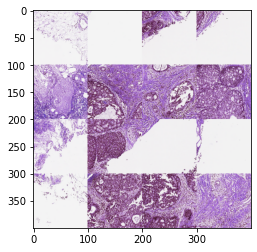

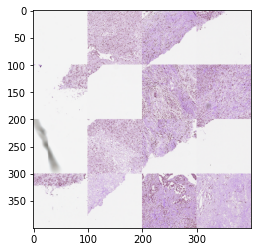

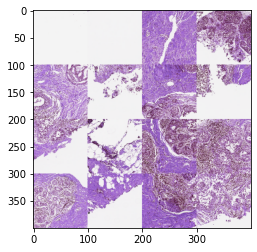

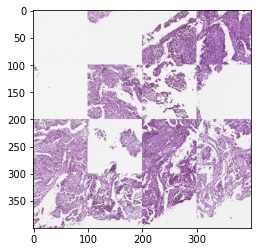

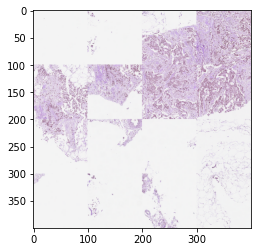

In [6]:
#이미지 5개만 표시
for x in X[:5]:
    plt.imshow(x)
    plt.show()

In [7]:
#데이터 형식 조정
x=np.array(X)
y=np.array(y_r)
x=x/256
x.shape,y.shape

In [11]:
#CNN 실행
keras.backend.clear_session()
model=keras.models.Sequential()
model.add(layers.Input(shape=(400,400,3)))

model.add(layers.Convolution2D(filters=32, padding='same',strides=(1,1),kernel_size=(3,3) ,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Convolution2D(filters=64, padding='same',strides=(1,1),kernel_size=(3,3) ,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(layers.Dropout(0.25))
 

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x, y, batch_size=10, epochs=9,verbose=1)

Epoch 1/9
100/100 [==============================] - 409s 4s/step - loss: 46.8538 - accuracy: 0.5200
Epoch 2/9
100/100 [==============================] - 386s 4s/step - loss: 0.7196 - accuracy: 0.5270
Epoch 3/9
100/100 [==============================] - 397s 4s/step - loss: 0.7269 - accuracy: 0.5120
Epoch 4/9
100/100 [==============================] - 385s 4s/step - loss: 0.7515 - accuracy: 0.5900
Epoch 5/9
100/100 [==============================] - 369s 4s/step - loss: 0.6854 - accuracy: 0.5750
Epoch 6/9
100/100 [==============================] - 333s 3s/step - loss: 0.6555 - accuracy: 0.5580
Epoch 7/9
100/100 [==============================] - 332s 3s/step - loss: 0.6679 - accuracy: 0.5660
Epoch 8/9
100/100 [==============================] - 329s 3s/step - loss: 0.6232 - accuracy: 0.6140
Epoch 9/9
100/100 [==============================] - 381s 4s/step - loss: 0.6226 - accuracy: 0.6070


In [11]:
#테스트 데이터 준비
test_data=pd.read_csv("test.csv")
testn_data=test_data["img_path"]
X_T=[]
mapsize=4*4
thresholds=200
for path in testn_data:
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img2=cv2.imread(path)
    high=0
    low=0
    highlist=[]
    lowlist=[]
    count=0
    while True:
        if count==mapsize:
            break
        high+=1
        while True:
            if low+100>=img.shape[1]:
                low=0
                high+=100
                break
            if count==mapsize:
                break
            low+=1
            if high+100>img.shape[0]:
                count=mapsize
                break
            if img[high][low]<thresholds:
                count+=1
                highlist.append(high)
                lowlist.append(low)
                if low+100>img.shape[1]:
                    high+=100
                else:
                    high+=100
                    low+=100
    imglist=[]
    for x,y,index in zip(highlist,lowlist,range(len(highlist))):
        imglist.append(img2[x:x+100,y:y+100])
    if len(imglist)<mapsize:
        a=cv2.vconcat([imglist[0],imglist[0],imglist[0],imglist[0]])
        b=cv2.vconcat([imglist[0],imglist[0],imglist[0],imglist[0]])
        c=cv2.vconcat([imglist[0],imglist[0],imglist[0],imglist[0]])
        d=cv2.vconcat([imglist[0],imglist[0],imglist[0],imglist[0]])
        X_T.append(cv2.hconcat([a,b,c,d]))
        print("check")
    else:
        a=cv2.vconcat([imglist[0],imglist[1],imglist[2],imglist[3],])
        b=cv2.vconcat([imglist[4],imglist[5],imglist[6],imglist[7]])
        c=cv2.vconcat([imglist[8],imglist[9],imglist[10],imglist[11]])
        d=cv2.vconcat([imglist[12],imglist[13],imglist[14],imglist[15]])
        X_T.append(cv2.hconcat([a,b,c,d]))

check
check
check


In [12]:
x_train=np.array(X)
x_test=np.array(X_T)
x_train=x_train/256
x_test=x_test/256

In [15]:
#train 셋 예측
train_pred=model.predict(x_train)

8/8 [==============================] - 10s 1s/step


In [16]:
#test 셋 예측
test_pred=model.predict(x_test)

array([[9.3340462e-01],
       [8.9983350e-01],
       [4.9256811e-01],
       [4.9359423e-01],
       [5.3775996e-01],
       [5.3035933e-01],
       [5.2833831e-01],
       [6.0049433e-01],
       [8.1573862e-01],
       [7.2683662e-01],
       [4.9256811e-01],
       [8.8736957e-01],
       [7.4714756e-01],
       [5.9437114e-01],
       [7.3002803e-01],
       [5.3908163e-01],
       [7.9231846e-01],
       [5.8019906e-01],
       [7.7858382e-01],
       [7.2518992e-01],
       [6.3607395e-01],
       [4.9356794e-01],
       [5.4636168e-01],
       [8.6494428e-01],
       [6.9761628e-01],
       [7.7863324e-01],
       [5.7834077e-01],
       [4.6739528e-01],
       [7.5783408e-01],
       [7.3967499e-01],
       [9.9994659e-01],
       [5.8723885e-01],
       [5.6573516e-01],
       [5.4269379e-01],
       [8.2728148e-01],
       [8.6952877e-01],
       [5.7692504e-01],
       [4.9256811e-01],
       [5.0139022e-01],
       [9.9757725e-01],
       [4.9256811e-01],
       [5.335163

# XGB

In [45]:
# 필요 라이브러리 import
import sys
import numpy as np
import pandas as pd

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import *

from xgboost import plot_importance

In [17]:
# train 데이터, test 데이터 읽어와서 train, test에 저장
# 각 데이터에 CNN결과값 변수 추가
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train["CNN"]=train_pred
test["CNN"]=test_pred

In [18]:
# 결측치 확인
train.isna().sum()

ID                     0
img_path               0
mask_path              0
나이                     0
수술연월일                  0
진단명                    0
암의 위치                  0
암의 개수                  0
암의 장경                 69
NG                    51
HG                    86
HG_score_1            92
HG_score_2            92
HG_score_3            89
DCIS_or_LCIS_여부        0
DCIS_or_LCIS_type    874
T_category             4
ER                     1
ER_Allred_score      297
PR                     1
PR_Allred_score      453
KI-67_LI_percent     235
HER2                  14
HER2_IHC              24
HER2_SISH            753
HER2_SISH_ratio      825
BRCA_mutation        945
N_category             0
CNN                    0
dtype: int64

In [20]:
from sklearn.impute import KNNImputer

#xgb feature importance에서 변수중요도 그래프를 봤을 때 그래프 수치가 높고 결측치가 많은 컬럼들을 train_temp에 저장

train_temp = pd.DataFrame({
    "암의 장경" : train["암의 장경"],
    "NG" : train["NG"],
    "HG" : train["HG"],
    "ER_Allred_score" : train["ER_Allred_score"],
    "PR_Allred_score" : train["PR_Allred_score"],
    "KI-67_LI_percent" : train["KI-67_LI_percent"],
    "HER2_SISH_ratio" : train["HER2_SISH_ratio"],
    })

In [21]:
# 미리 빼놓은 컬럼에 KNNImputer 적용.

imputer = KNNImputer(n_neighbors=5)
air_21_tp=imputer.fit_transform(train_temp)
air_21_tp=pd.DataFrame(air_21_tp, columns=train_temp.columns)

In [22]:
air_21_tp

,암의 장경,NG,HG,ER_Allred_score,PR_Allred_score,KI-67_LI_percent,HER2_SISH_ratio
0,19.0,2.0,1.0,8.0,6.0,12.000,1.412
1,22.0,3.0,3.0,6.6,5.0,70.000,1.448
2,15.2,2.0,1.8,7.0,4.0,7.000,1.152
3,0.0,3.0,3.0,5.2,4.8,1.000,1.728
4,8.0,2.0,2.0,8.0,6.6,8.000,5.440
...,...,...,...,...,...,...,...
995,25.0,1.0,1.0,7.8,6.8,4.814,1.846
996,7.0,1.0,1.0,7.2,5.6,3.284,1.128
997,15.0,1.0,1.0,7.2,7.2,1.868,1.360
998,7.0,1.0,1.0,7.2,5.6,3.284,1.128


In [23]:
# train 데이터에서 빼뒀던 컬럼을 test 데이터에서도 train_temp에 저장
test_temp = pd.DataFrame({
    "암의 장경" : test["암의 장경"],
    "NG" : test["NG"],
    "HG" : test["HG"],
    "ER_Allred_score" : test["ER_Allred_score"],
    "PR_Allred_score" : test["PR_Allred_score"],
    "KI-67_LI_percent" : test["KI-67_LI_percent"],
    "HER2_SISH_ratio" : test["HER2_SISH_ratio"],
    })

In [24]:
# 미리 빼놓은 컬럼에 KNNImputer 적용.
imputer = KNNImputer(n_neighbors=5)
test_21_tp=imputer.fit_transform(test_temp)
test_21_tp=pd.DataFrame(test_21_tp, columns=test_temp.columns)

In [25]:
test_21_tp

,암의 장경,NG,HG,ER_Allred_score,PR_Allred_score,KI-67_LI_percent,HER2_SISH_ratio
0,23.0,2.0,2.0,8.0,2.0,5.000,2.182
1,13.0,3.0,2.0,4.0,8.0,8.670,1.584
2,20.6,2.4,1.6,6.0,6.0,11.368,1.220
3,1.3,2.0,2.0,7.0,6.6,21.170,1.498
4,15.0,3.0,3.0,8.0,3.0,20.570,1.582
...,...,...,...,...,...,...,...
245,18.0,2.0,2.0,5.0,3.0,46.622,4.816
246,20.0,1.0,2.0,5.0,5.0,13.200,5.094
247,17.0,1.0,1.0,5.0,5.0,30.614,1.672
248,7.0,1.0,1.0,5.0,5.0,5.528,1.606


In [26]:
for i in range(len(train)):
    train["ID"][i]=int(train["ID"][i].split("_")[2])

for i in range(len(test)):
    test["ID"][i]=int(test["ID"][i].split("_")[2])

C:\Users\DM\AppData\Local\Temp\ipykernel_20024\1551245154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["ID"][i]=int(train["ID"][i].split("_")[2])
C:\Users\DM\AppData\Local\Temp\ipykernel_20024\1551245154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["ID"][i]=int(test["ID"][i].split("_")[2])


In [27]:
# train과 test 안에 있는 수술연월일 컬럼을 '년', ' 월', '일'로 분리

train["수술연월일"]=pd.to_datetime(train["수술연월일"])
train["년"]=0
train["월"]=0
train["일"]=0
for i in range(len(train)):
    train["년"][i]=train["수술연월일"][i].year
    train["월"][i]=train["수술연월일"][i].month
    train["일"][i]=train["수술연월일"][i].day
    
test["수술연월일"]=pd.to_datetime(test["수술연월일"])
test["년"]=0
test["월"]=0
test["일"]=0
for i in range(len(test)):
    test["년"][i]=test["수술연월일"][i].year
    test["월"][i]=test["수술연월일"][i].month
    test["일"][i]=test["수술연월일"][i].day

C:\Users\DM\AppData\Local\Temp\ipykernel_20024\3420419101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["년"][i]=train["수술연월일"][i].year
C:\Users\DM\AppData\Local\Temp\ipykernel_20024\3420419101.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["월"][i]=train["수술연월일"][i].month
C:\Users\DM\AppData\Local\Temp\ipykernel_20024\3420419101.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["일"][i]=train["수술연월일"][i].d

In [28]:
# 변수 중요도를 봤을 때 상대적으로 중요도가 낮은 변수들 제거 
train.drop(["BRCA_mutation","HER2_SISH","ER","PR","HG_score_2","HER2","mask_path","img_path","수술연월일"],axis=1,inplace=True)
test.drop(["BRCA_mutation","HER2_SISH","ER","PR","HG_score_2","HER2","img_path","수술연월일"],axis=1,inplace=True)

In [29]:
# 중요도가 낮은 컬럼을 제거하고 남은 변수들은 0으로 채우기
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [30]:
#결측치 확인
train.isna().sum()

ID                   0
나이                   0
진단명                  0
암의 위치                0
암의 개수                0
암의 장경                0
NG                   0
HG                   0
HG_score_1           0
HG_score_3           0
DCIS_or_LCIS_여부      0
DCIS_or_LCIS_type    0
T_category           0
ER_Allred_score      0
PR_Allred_score      0
KI-67_LI_percent     0
HER2_IHC             0
HER2_SISH_ratio      0
N_category           0
CNN                  0
년                    0
월                    0
일                    0
dtype: int64

In [31]:
test.isna().sum()

ID                   0
나이                   0
진단명                  0
암의 위치                0
암의 개수                0
암의 장경                0
NG                   0
HG                   0
HG_score_1           0
HG_score_3           0
DCIS_or_LCIS_여부      0
DCIS_or_LCIS_type    0
T_category           0
ER_Allred_score      0
PR_Allred_score      0
KI-67_LI_percent     0
HER2_IHC             0
HER2_SISH_ratio      0
CNN                  0
년                    0
월                    0
일                    0
dtype: int64

In [32]:
#X Y 분리
X=train.drop("N_category",axis=1)
y=train.loc[:,"N_category"]

In [33]:
# train test set 분리 test size 20%
seed = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [34]:
#그리드서치 XGB 모델링
grid_param = {'learning_rate':np.linspace(0.001,0.1,30),
              'n_estimators':[20,30,50,100]}
model = XGBClassifier(eval_metric ='logloss',
                     )
model_gs = GridSearchCV(model, grid_param, cv = 5, verbose=3)
model_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] learning_rate=0.001, n_estimators=20 ............................
[CV]  learning_rate=0.001, n_estimators=20, score=0.875, total=   0.1s
[CV] learning_rate=0.001, n_estimators=20 ............................
[CV]  learning_rate=0.001, n_estimators=20, score=0.863, total=   0.0s
[CV] learning_rate=0.001, n_estimators=20 ............................
[CV]  learning_rate=0.001, n_estimators=20, score=0.869, total=   0.0s
[CV] learning_rate=0.001, n_estimators=20 ............................
[CV]  learning_rate=0.001, n_estimators=20, score=0.831, total=   0.0s
[CV] learning_rate=0.001, n_estimators=20 ............................
[CV]  learning_rate=0.001, n_estimators=20, score=0.800, total=   0.0s
[CV] learning_rate=0.001, n_estimators=30 ............................
[CV]  learning_rate=0.001, n_estimators=30, score=0.875, total=   0.0s
[CV] learning_rate=0.001, n_estimators=30 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=30, score=0.863, total=   0.0s
[CV] learning_rate=0.001, n_estimators=30 ............................
[CV]  learning_rate=0.001, n_estimators=30, score=0.869, total=   0.0s
[CV] learning_rate=0.001, n_estimators=30 ............................
[CV]  learning_rate=0.001, n_estimators=30, score=0.831, total=   0.0s
[CV] learning_rate=0.001, n_estimators=30 ............................
[CV]  learning_rate=0.001, n_estimators=30, score=0.800, total=   0.0s
[CV] learning_rate=0.001, n_estimators=50 ............................
[CV]  learning_rate=0.001, n_estimators=50, score=0.875, total=   0.0s
[CV] learning_rate=0.001, n_estimators=50 ............................
[CV]  learning_rate=0.001, n_estimators=50, score=0.863, total=   0.0s
[CV] learning_rate=0.001, n_estimators=50 ............................
[CV]  learning_rate=0.001, n_estimators=50, score=0.869, total=   0.0s
[CV] learning_rate=0.001, n_estimators=50 ............................
[CV]  

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   25.4s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
             param_grid={'learning_rate': array([0.001     , 0.00441379, 0.00782759, 0.01124138, 0.01465517,
       0.01806897, 0.02148276, 0.02489655, 0.02831034, 0.03172414,
       0.03513793, 0.03855172, 0.04196552, 0.04537931, 0.0487931 ,
    

In [35]:
# 모델 적용 및 예측
pred = model_gs.predict(X_test)
print(classification_report(y_test, pred, target_names=['No Frauds', 'Frauds']))

              precision    recall  f1-score   support

   No Frauds       0.86      0.90      0.88       100
      Frauds       0.89      0.85      0.87       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



In [36]:
pred = model_gs.predict(test)

In [38]:
# sample 불러와서 N_category 컬럼에 예측값 넣기
submission = pd.read_csv('data/sample_submission.csv')
submission['N_category'] = pred

In [40]:
#최종 결과물
submission.to_csv("result_cnn_xgb.csv",index=False)

### 변수중요도 확인

In [46]:
# import matplotlib.pyplot as plt
# import seaborn as sns

In [ ]:
# 변수 중요도 plot
# def plot_feature_importance(importance, names, topn = 'all'):
#     feature_importance = np.array(importance)
#     feature_names = np.array(names)

#     data={'feature_names':feature_names,'feature_importance':feature_importance}
#     fi_temp = pd.DataFrame(data)

#     fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#     fi_temp.reset_index(drop=True, inplace = True)

#     if topn == 'all' :
#         fi_df = fi_temp.copy()
#     else :
#         fi_df = fi_temp.iloc[:topn]

#     plt.figure(figsize=(10,8))
#     sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

#     plt.xlabel('importance')
#     plt.ylabel('feature names')
#     plt.grid()

#     return fi_df

In [ ]:
# best_model = model_gs.best_estimator_

In [48]:
# result = plot_feature_importance(best_model.feature_importances_, list(X))